#### **Ejercicio:** Ejercicios de ACP

**Elaborado por:** Fabian Villarreal Sosa

**Tarea**

Tu tarea es hacer un análisis de componentes principales para agilizar un algoritmo de clasificación en un conjunto de datos multidimensional.

Usaremos el conjunto de datos de dígitos MNIST, que viene preinstalado en sklearn. Este conjunto de datos tiene imágenes de 8x8 pixeles de dígitos escritos a mano del 0 al 9. Tu tarea es clasificarlos para determinar qué dígitos son. Usa el ACP para decrementar las dimensiones en este conjunto de datos. Luego, usa un algoritmo de clasificación de tu elección para clasificar los dígitos. Nota que depende de ti determinar cuántos componentes principales usar para tu modelo, para conseguir un 95% de varianza en los datos.

https://en.wikipedia.org/wiki/MNIST_database

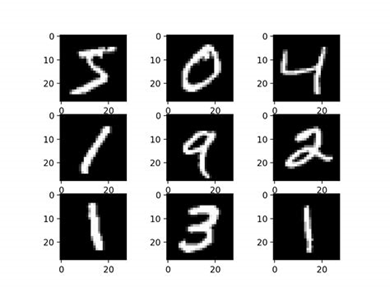

In [27]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [28]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

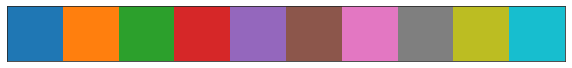

In [30]:
# Estilo de graficos
sns.set_style('white')

# Paleta de colores
my_palette = sns.color_palette('tab10', 10)
sns.palplot(sns.color_palette(my_palette, 10))

# Define palette
sns.set_palette(my_palette)

In [31]:
# Datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

df = mnist.data

In [32]:
print(df.shape)
df.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El conjunto de datos tiene la forma (70000, 784), lo que significa que estamos trabajando con 70,000 imágenes ¡con 784 dimensiones!

Nota que puedes acceder a los datos X usando `mnist.data`, y acceder a los objetivos usando `mnist.target`.

Si obtienes un error al usar el código anterior, puedes cargar los datos usando:

In [33]:
from keras.datasets import mnist

# Datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Remodelar datos
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Determinar la cantidad de PCs a utilizar

In [34]:
# Escalar datos
scaler = StandardScaler()
scaled_X_train_df = scaler.fit_transform(X_train)

In [35]:
# Aplicar PCA
pca = PCA(random_state = 2731)
pca.fit(scaled_X_train_df)

PCA(random_state=2731)

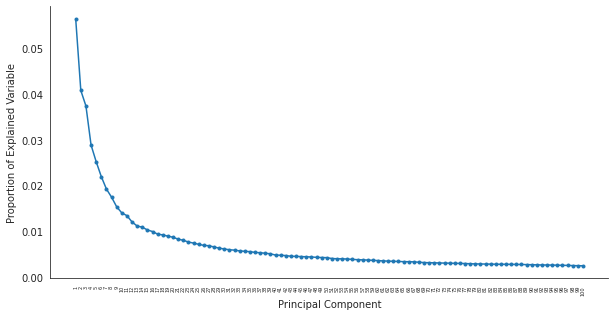

In [36]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.plot(range(1, 101),
         pca.explained_variance_ratio_[:100],
         marker = '.')
plt.xticks(ticks = range(1, 101), rotation = 90, fontsize = 5)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variable')

sns.despine()
plt.gcf().set_size_inches(10, 5);

In [37]:
# Determinar la cantidad de PCs para conseguir un 95% de varianza en los datos
# https://djy-git.github.io/2020/03/05/pca_mnist.html#gsc.tab=0

var_prop = pca.explained_variance_ratio_
var_acum = 0
for i, v in enumerate(var_prop):
  var_acum = var_acum + v
  if var_acum > 0.95:
    print('95% de varianza, PCs:', i, '\nVarianza explicada:', var_acum)
    break


95% de varianza, PCs: 330 
Varianza explicada: 0.9502951572319145


In [38]:
# Escalar datos
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
# Aplicar PCA
pca = PCA(n_components = 330, random_state = 2731) # Con 330 PCs se obtiene una varianza explicada del 95.03%
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

Estimar modelo

In [40]:
# Debido a que el objetivo es una variable categorica, se opta por un modelo clasificador
print(set(y_train))
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [41]:
# Estimar Random Forest
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(n_estimators = 100,
                             bootstrap = True, 
                             oob_score = True)

clf.fit(X_train_pca, y_train)

RandomForestClassifier(oob_score=True)

In [43]:
# Resultados
print('Train accuracy:', clf.score(X_train_pca, y_train))
print('Test accuracy:', clf.score(X_test_pca, y_test))

Train accuracy: 1.0
Test accuracy: 0.9367
